#library

In [ ]:
import pandas as pd
from pandas.core.frame import DataFrame

import numpy as np

import requests
import regex as re

import random

import nltk
from nltk.corpus import gutenberg,stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn import feature_extraction, manifold
from sklearn import decomposition

import gensim
import gensim.downloader as gensim_api
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings(action='once')

from sklearn.manifold import TSNE




In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#word ebbedding dictionnary, takes about 1-4 mins(376 MB)
nlp = gensim_api.load("glove-wiki-gigaword-100") 

[==================================================] 100.0% 128.1/128.1MB downloaded


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


# Data Partitioning

## ```partition()``` Devides the words list into 200 samples of 150 words each 

In [ ]:
def partition(words, book_label):
  n = len(words) // 150  # How many 150-word partitions are there?
  partitions =[]
  i = 0

  # Loop over the words to store each 150-word partition in a list inside partitions list
  while i < n:
    current = i*150
    partitions.append([words[current:current+150], book_label])
    i+=1


  # return a dataframe of 200 samples
  return DataFrame(partitions[:200], columns = ['words', 'Book_name'])


In [ ]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

## data_preperation returns a clean list of words from a single book







In [ ]:
stop_words = stopwords.words('english')
def data_preperation (url):
  #Getting data
  response = requests.get(url)
  text =response.text.lower()


  #Data cleansing:
  text = re.sub('[^a-z]+', ' ', text)

  # p = re.compile(r'\W+')
  # words = p.split(text)

  #Part of spech:
  pos_tagged = nltk.pos_tag(nltk.word_tokenize(text)) 
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

  lemmatizer  = WordNetLemmatizer()
  #lemmatized = [lemmatizer.lemmatize(wrd[0], pos =  wrd[1]) for wrd in wordnet_tagged if wrd[1]!=None and wrd not in stop_words]
  lemmatized_words = []
  for wrd in wordnet_tagged:
     #loop over the words and thier part of spech to lemmatize them
    if wrd[1]!= None and wrd[0] not in stop_words :
      if wrd[0][-3:] == 'ing': #to lemmatize a word even if it's a noun
        pos = 'v'
      else:
        pos =  wrd[1]
      #final = lemmatizer.lemmatize(wrd[0], pos =  pos)
      if lemmatizer.lemmatize(wrd[0], pos =  pos) in nlp.vocab.keys():
        lemmatized_words.append(lemmatizer.lemmatize(wrd[0], pos =  pos))

  # Pass the words, ignoring the first 500 to avoid introductions.. 
  return lemmatized_words[500:]

## Data_generator

In [ ]:
def Data_generator(urls=['https://www.gutenberg.org/files/68054/68054-0.txt'], labelels = ["a"]):
  # a dataframe to store samples from all of the books
  big_frame = DataFrame() 

  for url, label in zip(urls, labelels):
    words = data_preperation(url) #returns a list of words from a single book
    x = partition(words, label) # Devides the words list into 200 samples of 100 words each
    big_frame =pd.concat([big_frame, x]) # Append book samples to the big dataframe


  return big_frame

# ``` main ```  
Passes two lists of books urls & labels to ```Data_generator```

In [ ]:
#if __name__ == "__main__":
# urls = ['https://www.gutenberg.org/cache/epub/18350/pg18350.txt', #1)Social Life in the Insect World, Author: J. H. Fabre
#         'https://www.gutenberg.org/cache/epub/18931/pg18931.txt',  #2)Archeological Investigations, Author: Gerard Fowke
#         'https://www.gutenberg.org/cache/epub/13058/pg13058.txt',   #3)The Teeth of the Tiger, Author: Maurice Leblanc
#         'https://www.gutenberg.org/cache/epub/28056/pg28056.txt', #4)Music and Some Highly Musical People, Author: James M. Trotter
#         'https://www.gutenberg.org/cache/epub/21687/pg21687.txt', #)The Youngest Girl in the Fifth, Author: Angela Brazil
#         ]
urls = ['https://www.gutenberg.org/files/17321/17321-0.txt', #1)Social Life in the Insect World, Author: J. H. Fabre
        'https://www.gutenberg.org/cache/epub/22775/pg22775.txt',  #2)Archeological Investigations, Author: Gerard Fowke
        'https://www.gutenberg.org/cache/epub/10136/pg10136.txt',   #3)The Teeth of the Tiger, Author: Maurice Leblanc
        'https://www.gutenberg.org/cache/epub/28056/pg28056.txt', #4)Music and Some Highly Musical People, Author: James M. Trotter
        'https://www.gutenberg.org/cache/epub/51854/pg51854.txt', #)The Youngest Girl in the Fifth, Author: Angela Brazil
        ]
labelels = ["a", "b", "c", "d", "e"]

df = Data_generator(urls, labelels).sample(frac=1).reset_index(drop=True)

In [ ]:
df

,words,Book_name
0,"[ear, come, remark, authoritatively, say, good...",e
1,"[question, record, grant, certain, property, d...",a
2,"[remainder, stock, simmer, hour, rub, tammy, p...",c
3,"[genius, burn, brightly, soul, young, boy, cle...",d
4,"[house, limit, make, war, roosevelt, die, see,...",e
...,...,...
995,"[exactly, degree, reach, advice, give, nothing...",b
996,"[look, private, life, business, germaine, virg...",e
997,"[text, begin, similar, sumerian, babylonian, s...",a
998,"[make, rapid, progress, become, favorite, pupi...",d


#Data Transformers

### BOW

In [ ]:
paragraph=" "
paragraph_list=[]
for x in df['words']:
    paragraph=paragraph.join(x) 
    paragraph_list.append(paragraph)
    paragraph=" "
#paragraph_list =paragraph_list + paragraph_list
len(paragraph_list)

1000

In [ ]:
def BOW(sentences_book):
  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform(sentences_book).toarray()
  
  return X_train_counts

###TF-IDF

In [ ]:
def TF_IDF(X_train_counts):
  tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
  X_train_tf = tf_transformer.transform(X_train_counts).toarray()
  
  return X_train_tf

###LDA

In [ ]:
dictionary = Dictionary(df['words'])
bow_ = [dictionary.doc2bow(partition) for partition in df['words']]  # bag of words for each partition
example = pd.DataFrame(bow_[10], columns=["token_id", "frequency"])

def lda_training(n_topics, dictionary):
  lda_model = gensim.models.LdaModel(bow_,
               id2word = dictionary,
               num_topics = n_topics,
               random_state = 100,
               passes = 50,
               iterations = 500, 
               chunksize = 100
               )
  coherence_lda = gensim.models.coherencemodel.CoherenceModel(model=lda_model, texts=df['words'], dictionary=dictionary , coherence='c_v')
  coherence_lda = coherence_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)
  print(lda_model.print_topics())
  return lda_model

In [ ]:
lda1 = lda_training(n_topics = 10,dictionary = dictionary)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)



Coherence Score:  0.6122770289965505
[(0, '0.015*"king" + 0.013*"early" + 0.012*"find" + 0.012*"dynasty" + 0.010*"period" + 0.010*"name" + 0.009*"egyptian" + 0.008*"great" + 0.007*"egypt" + 0.006*"time"'), (1, '0.039*"mental" + 0.026*"brain" + 0.017*"patient" + 0.016*"idea" + 0.015*"process" + 0.015*"mind" + 0.013*"experience" + 0.012*"physical" + 0.011*"disturbance" + 0.011*"disease"'), (2, '0.013*"water" + 0.013*"soup" + 0.013*"hour" + 0.012*"stock" + 0.011*"quart" + 0.010*"time" + 0.010*"put" + 0.009*"meat" + 0.009*"boil" + 0.008*"add"'), (3, '0.015*"sauce" + 0.013*"boil" + 0.011*"make" + 0.011*"carve" + 0.011*"cook" + 0.011*"roast" + 0.011*"pudding" + 0.009*"dress" + 0.009*"dish" + 0.009*"bake"'), (4, '0.007*"thus" + 0.007*"even" + 0.006*"work" + 0.006*"life" + 0.006*"musical" + 0.006*"time" + 0.006*"give" + 0.006*"state" + 0.006*"mean" + 0.006*"become"'), (5, '0.017*"sumerian" + 0.016*"psychology" + 0.015*"life" + 0.014*"psychological" + 0.013*"view" + 0.010*"causal" + 0.010*"fac

In [ ]:
def feature_vectorize(lda):

  # Convert target column from string to numbers 
  df.Book_name = pd.Categorical(df.Book_name)
  df['Book_name'] = df.Book_name.cat.codes

  
  train_vecs = []
  for i in range(len(df['words'])):
    top_topics = lda.get_document_topics(bow_[i], minimum_probability = 0.0)
    topic_vec = [top_topics[i][1] for i in range(len(lda.print_topics()))]
    train_vecs.append(topic_vec)

  features = pd.DataFrame(train_vecs)
  lda_data = features.join(df["Book_name"])#.sample(frac = 1)

  lda_x = lda_data[lda_data.columns[:-1]]
  lda_y = pd.DataFrame(lda_data[lda_data.columns[-1]])
  return lda_data, lda_x, lda_y

###Word Embedding

In [ ]:
def word_embidding():
  reduction = []
  for i in range(0, 1000):
    #transform each word to a vec
    doc2vec = nlp[df['words'].iloc[i]]

    #reduce the dimensions from 300 to 2
    pca = decomposition.PCA(n_components=50)
    reduction.append(doc2vec)

  we_array = np.array(reduction).reshape(1000, 100*150)  
  return pd.DataFrame(we_array)

## Implement transformations 

In [ ]:
X_train_counts= BOW(paragraph_list)
X_train_tf= TF_IDF(X_train_counts)
# x_train_ngram=Ngram(paragraph_list)
lda_data, lda_x, lda_y = feature_vectorize(lda1)
X_train_we = word_embidding()

In [ ]:
lda_x

,0,1,2,3,4,5,6,7,8,9
0,0.000662,0.180973,0.000662,0.023051,0.000662,0.000662,0.692901,0.072249,0.018457,0.009721
1,0.910998,0.000663,0.012357,0.000663,0.054453,0.000662,0.000662,0.000662,0.018217,0.000662
2,0.000662,0.000662,0.887298,0.000662,0.071344,0.010471,0.000662,0.000662,0.026914,0.000662
3,0.000662,0.000662,0.000662,0.007794,0.714808,0.000662,0.000662,0.000662,0.242295,0.031128
4,0.000662,0.000663,0.044111,0.000662,0.134099,0.000662,0.817153,0.000662,0.000662,0.000662
...,...,...,...,...,...,...,...,...,...,...
995,0.020196,0.144696,0.028968,0.007553,0.714576,0.000662,0.000663,0.023502,0.023946,0.035239
996,0.017190,0.030846,0.041525,0.009077,0.255105,0.000663,0.544039,0.047968,0.046065,0.007523
997,0.578319,0.000662,0.017186,0.000662,0.100862,0.276647,0.000662,0.000662,0.023674,0.000662
998,0.060336,0.000662,0.083359,0.019817,0.425021,0.000662,0.033255,0.000662,0.299679,0.076546


In [ ]:
lda_x

,0,1,2,3,4,5,6,7,8,9
0,0.000662,0.180973,0.000662,0.023051,0.000662,0.000662,0.692901,0.072249,0.018457,0.009721
1,0.910998,0.000663,0.012357,0.000663,0.054453,0.000662,0.000662,0.000662,0.018217,0.000662
2,0.000662,0.000662,0.887298,0.000662,0.071344,0.010471,0.000662,0.000662,0.026914,0.000662
3,0.000662,0.000662,0.000662,0.007794,0.714808,0.000662,0.000662,0.000662,0.242295,0.031128
4,0.000662,0.000663,0.044111,0.000662,0.134099,0.000662,0.817153,0.000662,0.000662,0.000662
...,...,...,...,...,...,...,...,...,...,...
995,0.020196,0.144696,0.028968,0.007553,0.714576,0.000662,0.000663,0.023502,0.023946,0.035239
996,0.017190,0.030846,0.041525,0.009077,0.255105,0.000663,0.544039,0.047968,0.046065,0.007523
997,0.578319,0.000662,0.017186,0.000662,0.100862,0.276647,0.000662,0.000662,0.023674,0.000662
998,0.060336,0.000662,0.083359,0.019817,0.425021,0.000662,0.033255,0.000662,0.299679,0.076546


#Models

##Imports

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from IPython.display import clear_output
from sklearn.metrics import cohen_kappa_score
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics.cluster import homogeneity_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import GenericUnivariateSelect, chi2

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
def selection(x,y):
  transformer = GenericUnivariateSelect(chi2, mode='k_best', param=1000)
  return transformer.fit_transform(x,y)

In [ ]:
def change_scaling(feature_data):

  scaler = MinMaxScaler()
  scaler.fit(feature_data)
  new_data=scaler.transform(feature_data)
  return new_data

In [ ]:
#determine optimal number of clusters
def get_no_clusters(feature_data):
  wcss = []
  for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
      kmeans.fit(feature_data)
      wcss.append(kmeans.inertia_)
      
  plt.plot(range(1, 11), wcss)
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()
  
  s = []
  for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(feature_data)
    s.append(silhouette_score(feature_data, kmeans.labels_))

  plt.plot(range(2, 11), s)
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette')
  plt.show()
  clear_output

  plt.bar(range(2, 11), s)
  plt.xlabel('Number of Clusters')
  plt.ylabel('V-Measure Score')
  plt.title('Comparison of different Clustering Models')
  plt.show()

In [ ]:
def k_mean_model(feature_data,k):

  #apply k_means
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=30, random_state=100)
  model=kmeans.fit(feature_data)
  pred_y = kmeans.predict(feature_data)
  return pred_y,model

In [ ]:
def plot_kmeans(feature_data,title):
  
  #PCA
  pca = PCA(n_components=2)
  new_feature=pca.fit_transform(feature_data)

  kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=100)
  model=kmeans.fit(new_feature)
  pred_y = kmeans.predict(new_feature)

  #build dataframe
  new_df=pd.DataFrame()
  x_list=[]
  y_list=[]
  for i in new_feature:
    x_list.append(i[0])
    y_list.append(i[1])

  new_df['x']=pd.DataFrame(x_list)
  new_df['y']=pd.DataFrame(y_list)
  new_df['label']=pd.DataFrame(pred_y)
  
  #plot_seaborn
  sns.scatterplot(data=new_df,x=new_df.iloc[:,0],y=new_df.iloc[:,1],s=120,hue=new_df['label'])
  plt.title(f'K_MEAN WITH {title}')
  sns.scatterplot(x=kmeans.cluster_centers_[:, 0],y=kmeans.cluster_centers_[:, 1],s=150,color='y')
  

In [ ]:
def compare_target(y_pred):

  compare_df = pd.concat([df, pd.DataFrame(y_pred, columns = ['predicted'])], axis=1)
  for i in range(5):
    predicted_class = compare_df[compare_df['Book_name'] == i].predicted.mode()[0]
    compare_df["predicted"] = compare_df.predicted.replace(predicted_class, i)
  return compare_df["predicted"].to_numpy()

##K-mean

###coherence

In [ ]:
def joinDocPartitions(text_df, groupby_col):
    doc_labels = sorted(text_df[groupby_col].unique())
    docs = []
    for i, label in enumerate(doc_labels):
        doc_text = text_df[text_df[groupby_col] == label]
        text = ' '.join(doc_text["document"].values)
        docs.append(text)
    return docs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def getMostFreqWordsText(text_df, n_words, groupby_col):
  '''Accepts df with text partitions unlinke
      getMostFreqWords function that needs
      BOW or TFIDF encoded df'''
  docs = joinDocPartitions(text_df, groupby_col)
  freq_terms = []
  for doc in docs:
    vectorizer = CountVectorizer(max_features=n_words)
    vectorizer.fit([doc])
    vocab = vectorizer.get_feature_names()
    freq_terms.append(vocab)
  return freq_terms

In [ ]:
# centroid_colname -> the name of target column
# df_pred          -> dataFrame of two columns the first is the documents(original documents) and the second column is the prediction of em model

from itertools import combinations

def compute_coherence(df_pred, w2v_model, centroid_colname = "pred", top_n=20):
  word_freqs_list = getMostFreqWordsText(df_pred, top_n, centroid_colname)

  coherences = []
  for i in range(len(word_freqs_list)):
    freq_words = word_freqs_list[i]
    topic_similarity = []
    for word_i, word_j in combinations(freq_words, 2):
      try:
        topic_similarity.append(w2v_model.wv.similarity(word_i, word_j))
      except:
        pass
        #print(f"Niether {word_i} nor {word_j} is in vocab, skipping")
    avg_similarity = sum(topic_similarity) / len(topic_similarity)
    coherences.append(avg_similarity)
  return sum(coherences)/len(coherences)


In [ ]:
# slice document into words
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data['document'].iteritems():
        word_list = sentence[1].split()
        corpus.append(word_list)
          
    return corpus

###evaluate

In [ ]:
x=df['Book_name'].to_numpy()
def evaluate_model(model,feature_data,pred_y):
  print(f'the silhouette_score = {silhouette_score(feature_data,pred_y)}')
  print(f'the Kappa_score = {cohen_kappa_score(x,pred_y)}')
  #print(f'the homogeneity_score = {homogeneity_score(x,pred_y)}')  


###k-mean with BOW 

In [ ]:
# #X_train_counts, X_train_tf, lda_x, X_train_we
#get_no_clusters(X_train_counts)
y_pred,model=k_mean_model(X_train_counts,5)
print(f'the homogeneity_score = {homogeneity_score(x,y_pred)}')  
y_pred=compare_target(y_pred)
evaluate_model(model,X_train_counts,y_pred)
#plot_kmeans(X_train_counts," BOW")

the homogeneity_score = 0.877890353270728
the silhouette_score = 0.009538945728095985
the Kappa_score = 0.6637500000000001


In [ ]:
#compute coherence
cdf = DataFrame()
cdf['document'] = df.words
cdf.document = cdf.document.apply(lambda x:' '.join(x))
cdf['pred'] =y_pred

# df -> the original dataframe which contains the text documents and the titles
from gensim.models import Word2Vec
corpus = build_corpus(cdf)        
w2v_model = Word2Vec(corpus, size=30, window=9, min_count=10, workers=4)
print(f'the coherence score of k mean is {compute_coherence(cdf,w2v_model)}')

the coherence score of k mean is 0.7572433264117296


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

###Ek-mean with tf_idf

In [ ]:
#X_train_counts, X_train_tf, lda_x, X_train_we
#get_no_clusters(X_train_tf)
y_pred,model=k_mean_model(X_train_tf,5)
print(f'the homogeneity_score = {homogeneity_score(x,y_pred)}') 
y_pred=compare_target(y_pred)
evaluate_model(model,X_train_tf,y_pred)
#plot_kmeans(X_train_tf,"TF-IDF")

the homogeneity_score = 0.892943173671078
the silhouette_score = 0.03577874567994278
the Kappa_score = 0.6675


In [ ]:
#compute coherence
cdf = DataFrame()
cdf['document'] = df.words
cdf.document = cdf.document.apply(lambda x:' '.join(x))
cdf['pred'] =y_pred

# df -> the original dataframe which contains the text documents and the titles
from gensim.models import Word2Vec
corpus = build_corpus(cdf)        
w2v_model = Word2Vec(corpus, size=30, window=9, min_count=10, workers=4)
print(f'the coherence score of k mean is {compute_coherence(cdf,w2v_model)}')

the coherence score of k mean is 0.8529711748228261


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

###k_mean with lda_x

In [ ]:
#X_train_counts, X_train_tf, lda_x, X_train_we
#get_no_clusters(lda_x)
y_pred,model=k_mean_model(lda_x,5)
print(f'the homogeneity_score = {homogeneity_score(x,y_pred)}') 
y_pred=compare_target(y_pred)
evaluate_model(model,lda_x,y_pred)
#plot_kmeans(lda_x,"LDA")

the homogeneity_score = 0.7607970803799996
the silhouette_score = 0.28200647234916687
the Kappa_score = 0.18625000000000003


In [ ]:
#compute coherence
cdf = DataFrame()
cdf['document'] = df.words
cdf.document = cdf.document.apply(lambda x:' '.join(x))
cdf['pred'] =y_pred

# df -> the original dataframe which contains the text documents and the titles
from gensim.models import Word2Vec
corpus = build_corpus(cdf)        
w2v_model = Word2Vec(corpus, size=30, window=9, min_count=10, workers=4)
print(f'the coherence score of k mean is {compute_coherence(cdf,w2v_model)}')

the coherence score of k mean is 0.8355069458876785


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
D

###k_mean with X_train_we

In [ ]:
#X_train_counts, X_train_tf, lda_x, X_train_we
#get_no_clusters(X_train_we)
y_pred,model=k_mean_model(X_train_we,5)
print(f'the homogeneity_score = {homogeneity_score(x,y_pred)}')
y_pred=compare_target(y_pred)
evaluate_model(model,X_train_we,y_pred)
#plot_kmeans(X_train_we,"word Embedding")

the homogeneity_score = 0.6232770060379154
the silhouette_score = -0.011160289868712425
the Kappa_score = 0.24624999999999997


In [ ]:
#compute coherence
cdf = DataFrame()
cdf['document'] = df.words
cdf.document = cdf.document.apply(lambda x:' '.join(x))
cdf['pred'] =y_pred

# df -> the original dataframe which contains the text documents and the titles
from gensim.models import Word2Vec
corpus = build_corpus(cdf)        
w2v_model = Word2Vec(corpus, size=30, window=9, min_count=10, workers=4)
print(f'the coherence score of k mean is {compute_coherence(cdf,w2v_model)}')

the coherence score of k mean is 0.8045489200832028


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
D

##Expectation Maximization

###Evaluation

In [ ]:
def compare_target(y_pred):

  compare_df = pd.concat([df, pd.DataFrame(y_pred, columns = ['predicted'])], axis=1)
  for i in range(5):
    predicted_class = compare_df[compare_df['Book_name'] == i].predicted.mode()[0]
    compare_df["predicted"] = compare_df.predicted.replace(predicted_class, i)
  return compare_df["predicted"].to_numpy()

In [ ]:
def joinDocPartitions(text_df, groupby_col):
    doc_labels = sorted(text_df[groupby_col].unique())
    docs = []
    for i, label in enumerate(doc_labels):
        doc_text = text_df[text_df[groupby_col] == label]
        text = ' '.join(doc_text["document"].values)
        docs.append(text)
    return docs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def getMostFreqWordsText(text_df, n_words, groupby_col):
  '''Accepts df with text partitions unlinke
      getMostFreqWords function that needs
      BOW or TFIDF encoded df'''
  docs = joinDocPartitions(text_df, groupby_col)
  freq_terms = []
  for doc in docs:
    vectorizer = CountVectorizer(max_features=n_words)
    vectorizer.fit([doc])
    vocab = vectorizer.get_feature_names()
    freq_terms.append(vocab)
  return freq_terms

In [ ]:
from itertools import combinations

def compute_coherence(df_pred, w2v_model, centroid_colname = "pred", top_n=20):
  word_freqs_list = getMostFreqWordsText(df_pred, top_n, centroid_colname)

  coherences = []
  for i in range(len(word_freqs_list)):
    freq_words = word_freqs_list[i]
    topic_similarity = []
    for word_i, word_j in combinations(freq_words, 2):
      try:
        topic_similarity.append(w2v_model.wv.similarity(word_i, word_j))
      except:
        pass
        #print(f"Niether {word_i} nor {word_j} is in vocab, skipping")
    avg_similarity = sum(topic_similarity) / len(topic_similarity)
    coherences.append(avg_similarity)
  return sum(coherences)/len(coherences)

In [ ]:
# slice document into words
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data['document'].iteritems():
        word_list = sentence[1].split()
        corpus.append(word_list)
          
    return corpus

In [ ]:
cdf = DataFrame()
cdf['document'] = df.words
cdf.document = cdf.document.apply(lambda x:' '.join(x))

In [ ]:
def evaluate_model(feature_data,pred_y, m_pred_y):
  x=df['Book_name'].to_numpy()

  cdf['pred'] = pred_y
  coherence = compute_coherence(cdf,w2v_model)
  clear_output()
  print(f'the silhouette_score = {silhouette_score(feature_data,m_pred_y)}')
  print(f'the Kappa_score = {cohen_kappa_score(x,m_pred_y)}')
  print(f'the homogeneity_score = {homogeneity_score(x,pred_y)}')  
  print(f'the coherence_score = {coherence}')  
  

In [ ]:
import random
cdf['pred'] = [random.randint(1,4) for i in range(1000)] 

In [ ]:
from gensim.models import Word2Vec
corpus = build_corpus(cdf)        
w2v_model = Word2Vec(corpus, size=30, window=9, min_count=10, workers=4)

In [ ]:
# print(f'the coherence_score = {compute_coherence(cdf,w2v_model)}')

###Dimentionality Rediction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=1000)
bow = pca.fit_transform(X_train_counts)

pca = PCA(n_components=1000)
tf_idf = pca.fit_transform(X_train_tf)

# pca = PCA(n_components=1000)
# lda = pca.fit_transform(lda_data)

pca = PCA(n_components=1000)
we = pca.fit_transform(X_train_we.values)

###Plotting

In [ ]:
from sklearn.mixture import GaussianMixture


In [ ]:
def plot_em(data, k=5):
  import seaborn as sns
  #PCA
  pca = PCA(n_components=2)
  new_feature=pca.fit_transform(data)

  model = GaussianMixture(k, covariance_type='full', random_state=0).fit(DataFrame(data))
  pred_y = model.predict(data)

  #build dataframe
  new_df=pd.DataFrame()
  x_list=[]
  y_list=[]
  for i in new_feature:
    x_list.append(i[0])
    y_list.append(i[1])

  new_df['x']=pd.DataFrame(x_list)
  new_df['y']=pd.DataFrame(y_list)
  new_df['label']=pd.DataFrame(pred_y)
  
  #plot_seaborn
  sns.scatterplot(data=new_df,x=new_df.iloc[:,0],y=new_df.iloc[:,1],s=120,hue=new_df['label'])
  # sns.scatterplot(x=kmeans.cluster_centers_[:, 0],y=kmeans.cluster_centers_[:, 1],s=150,color='y')
  clear_output()
  return pred_y

###EM and BOW

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

bic_bow = []
aic_bow = []
for i in range(2, 11):
  em = GaussianMixture(i, covariance_type='spherical', random_state=0).fit(DataFrame(bow))
  bic_bow.append(em.bic(bow))
  aic_bow.append(em.aic(bow))

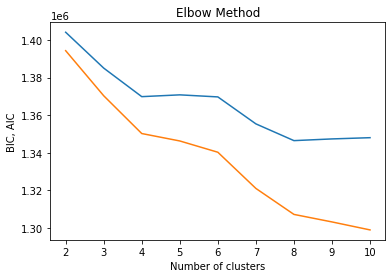

In [ ]:
plt.plot(range(2, 11), bic_bow)
plt.plot(range(2, 11), aic_bow)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('BIC, AIC')
plt.show()

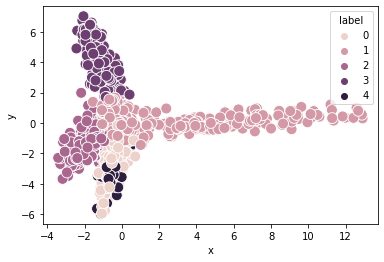

In [ ]:
pred_bow = plot_em(bow, 5)

In [ ]:
m_pred_bow = compare_target(pred_bow)
evaluate_model(bow, pred_bow, m_pred_bow)

the silhouette_score = 0.039710032995256286
the Kappa_score = 0.17625000000000002
the homogeneity_score = 0.8056522150202592
the coherence_score = 0.8567708597175386


###EM and TF-IDF

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

bic_tf = []
aic_tf = []
for i in range(2, 11):
  em = GaussianMixture(i, covariance_type='spherical', random_state=0).fit(DataFrame(tf_idf))
  bic_tf.append(em.bic(tf_idf))
  aic_tf.append(em.aic(tf_idf))

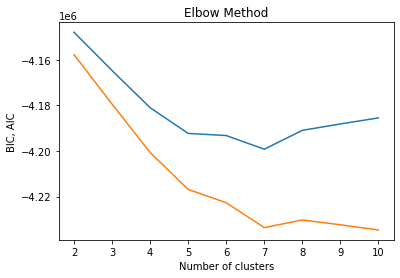

In [ ]:
plt.plot(range(2, 11), bic_tf)
plt.plot(range(2, 11), aic_tf)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('BIC, AIC')
plt.show()

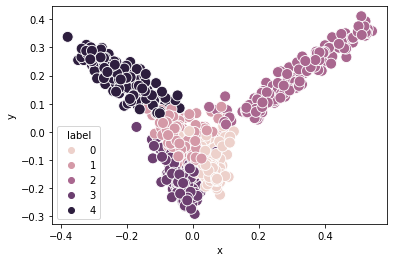

In [ ]:
pred_tf = plot_em(tf_idf, 5)

In [ ]:
m_pred_tf = compare_target(pred_tf)
evaluate_model(bow, pred_tf, m_pred_tf)


the silhouette_score = 0.01694288785150902
the Kappa_score = 0.68125
the homogeneity_score = 0.8975776477059287
the coherence_score = 0.8927969858991472


###EM and LDA

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

bic_lda = []
aic_lda = []
for i in range(2, 11):
  em = GaussianMixture(i, covariance_type='full', random_state=0).fit(DataFrame(lda_data))
  bic_lda.append(em.bic(lda_data))
  aic_lda.append(em.aic(lda_data))
clear_output()

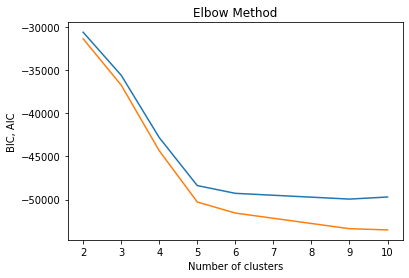

In [ ]:
plt.plot(range(2, 11), bic_lda)
plt.plot(range(2, 11), aic_lda)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('BIC, AIC')
plt.show()

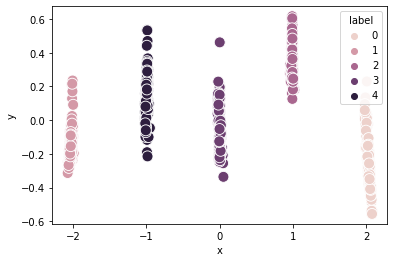

In [ ]:
pred_lda = plot_em(lda_data, 5)

In [ ]:
m_pred_lda = compare_target(pred_lda)
evaluate_model(bow, pred_lda, m_pred_lda)


the silhouette_score = 0.014239063536151115
the Kappa_score = 0.75
the homogeneity_score = 1.0
the coherence_score = 0.8955694088967224


###EM and Word Embedding

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

bic_we = []
aic_we = []
for i in range(1, 11):
  em = GaussianMixture(i, covariance_type='full', init_params = 'random').fit(DataFrame(we))
  bic_we.append(em.bic(we))
  aic_we.append(em.aic(we))

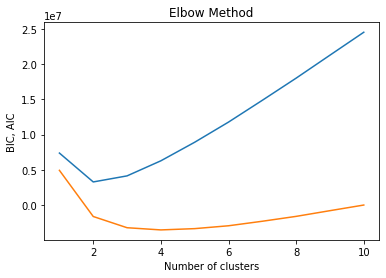

In [ ]:
plt.plot(range(1, 11), bic_we)
plt.plot(range(1, 11), aic_we)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('BIC, AIC')
plt.show()

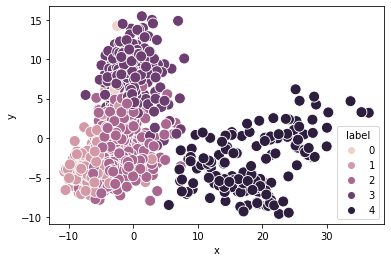

In [ ]:
pred_we = plot_em(we, 5)

In [ ]:
m_pred_we = compare_target(pred_we)
evaluate_model(bow, pred_we, m_pred_we)

the silhouette_score = 0.025804898530326296
the Kappa_score = 0.49
the homogeneity_score = 0.5872451734153666
the coherence_score = 0.8680524963924758


##Hierarchical

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics import cohen_kappa_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import cohen_kappa_score, silhouette_score
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
!pip install plotly
import plotly.express as xpr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1, casting="unsafe", dtype=np.float),
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/imp

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [ ]:
def visualize_hc_tsne(y_hc,X):
  tsne = TSNE(verbose=3,n_components=2)
  points = tsne.fit_transform(X)
  plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
  plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
  plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
  plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')
  plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='yellow')

In [ ]:
def visualize_hc_pca(y_hc,X):
  pca = PCA(n_components=2)
  points = pca.fit_transform(X)
  plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
  plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
  plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
  plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')
  plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='yellow')

In [ ]:
def plot_dendogram(data,image_name):
  #Create dendrogram
  linkage_matrix = ward(data) #define the linkage_matrix using ward clustering pre-computed distances

  fig, ax = plt.subplots(figsize=(15, 15)) # set size
  ax = dendrogram(linkage_matrix, orientation="top")

  plt.tick_params(
      axis= 'x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom='off',      # ticks along the bottom edge are off
      top='off',         # ticks along the top edge are off
      labelbottom='off')

  plt.tight_layout() #show plot with tight layout

  #uncomment below to save figure
  plt.savefig(image_name, dpi=200) #save figure as ward_clusters

In [ ]:
def visualize_data(data):
  tsne = TSNE(verbose=3,n_components=2)
  x = tsne.fit_transform(data)
  sns.scatterplot(x = x[:,0], y=x[:,1], hue=df.Book_name)

###Choose The Best #Clusters

In [ ]:
def get_best_n_cluster(data):
  #use silhouette score to get the best #clusters
  score = []
  for i in range(2,11):
    hc_cluster = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'ward')
    hc_cluster.fit_predict(data)
    s = silhouette_score(data, hc_cluster.labels_, metric='euclidean')
    score.append(s)
    print('Silhouette Score: %.3f' % s)
  plt.plot(range(2,11),score)
  plt.xlabel("Number Of Clusters")
  plt.ylabel("Silhouette Score")
  plt.title("Choose The Best number Of Clusters")

In [ ]:
def re_arange_df(y_pred):
  y_pred = np.sort(y_pred)
  y_pred_df = pd.DataFrame(y_pred,columns=['Predicted'])
  print(np.unique(y_pred_df.Predicted, return_counts=True))
  real = []
  for i in df.Book_name:
    if i == 'a':
      real.append(0)
    elif i == 'b':
      real.append(1)
    elif i == 'c':
      real.append(2)
    elif i == 'd':
      real.append(3)
    else:
      real.append(4)
  
  y_pred_df['Real'] = np.sort(real)
  print(np.unique(y_pred_df.Real, return_counts=True))

  return y_pred_df

###HC_BOW

In [ ]:
bow_df = pd.read_csv("X_train_counts.csv")

FileNotFoundError: ignored

In [ ]:
bow_df.dropna(inplace = True)

In [ ]:
bow_df

In [ ]:
plot_dendogram(np.array(bow_df),"BOW_HC.png")

In [ ]:
get_best_n_cluster(bow_df)

In [ ]:
bow_y_predict_hc = hc.fit_predict(bow_df)

In [ ]:
np.unique(bow_y_predict_hc, return_counts=True)

In [ ]:
#Visualize data before and after cluster
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
visualize_hc_tsne(bow_y_predict_hc,bow_df)
plt.subplot(2,2,2)
visualize_hc_pca(bow_y_predict_hc,bow_df)
plt.subplot(2,2,3)
visualize_data(bow_df)
plt.suptitle("Show The Original Data Before & After Cluster [Show The Data Using DR 'PCA' && 'TSNE'] ")

In [ ]:
#Calculate cohen_kappa score
new_df = re_arange_df(bow_y_predict_hc)
new_df
bow_kappa = cohen_kappa_score(new_df.Predicted,new_df.Real)
print(bow_kappa)

In [ ]:
#silhouette_score
score = silhouette_score(bow_df, hc.labels_, metric='euclidean')
score

In [ ]:
#Coherance
texts = df.iloc[:, 0]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


goodLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=50, num_topics=2)
badLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=1, num_topics=2)

cm_good = CoherenceModel(model=goodLdaModel, corpus=corpus, coherence='u_mass')
cm_bad = CoherenceModel(model=badLdaModel, corpus=corpus, coherence='u_mass')

# get coherence value
coherence_good = cm_good.get_coherence()  
coherence_bad = cm_bad.get_coherence() 

print(coherence_good, coherence_bad)

###TF-IDF HC

In [ ]:
tf_df = pd.read_csv("X_train_tf.csv")

In [ ]:
tf_df.dropna(inplace = True)

In [ ]:
tf_df

In [ ]:
plot_dendogram(np.array(tf_df),"TF_HC.png")

In [ ]:
get_best_n_cluster(tf_df)

In [ ]:
tf_y_predict_hc = hc.fit_predict(tf_df)

In [ ]:
np.unique(tf_y_predict_hc, return_counts=True)

In [ ]:
#Visualize data before and after cluster
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
visualize_hc_tsne(tf_y_predict_hc,tf_df)
plt.subplot(2,2,2)
visualize_hc_pca(tf_y_predict_hc,tf_df)
plt.subplot(2,2,3)
visualize_data(tf_df)
plt.suptitle("Show The Original Data Before & After Cluster [Show The Data Using DR 'PCA' && 'TSNE'] ")

In [ ]:
#Calculate cohen_kappa score
new_df = re_arange_df(tf_y_predict_hc)
new_df
tf_kappa = cohen_kappa_score(new_df.Predicted,new_df.Real)
print(tf_kappa)

In [ ]:
#silhouette_score
score = silhouette_score(tf_df, hc.labels_, metric='euclidean')
score

In [ ]:
#Coherance
texts = df.iloc[:, 0]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


goodLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=50, num_topics=2)
badLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=1, num_topics=2)

cm_good = CoherenceModel(model=goodLdaModel, corpus=corpus, coherence='u_mass')
cm_bad = CoherenceModel(model=badLdaModel, corpus=corpus, coherence='u_mass')

# get coherence value
coherence_good = cm_good.get_coherence()  
coherence_bad = cm_bad.get_coherence() 

print(coherence_good, coherence_bad)

###LDA HC

In [ ]:
lda_df = pd.read_csv("lda_data.csv")

In [ ]:
lda_df.dropna(inplace = True)

In [ ]:
lda_df

In [ ]:
X_train_lda = lda_df.iloc[:, :-1]
Y_train_lda = lda_df.iloc[:, -1]

In [ ]:
plot_dendogram(np.array(X_train_lda),"LDA_HC.png")

In [ ]:
get_best_n_cluster(X_train_lda)

In [ ]:
lda_y_predict_hc = hc.fit_predict(X_train_lda)

In [ ]:
np.unique(lda_y_predict_hc, return_counts=True)

In [ ]:
#Visualize data before and after cluster
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
visualize_hc_tsne(lda_y_predict_hc,X_train_lda)
plt.subplot(2,2,2)
visualize_hc_pca(lda_y_predict_hc,X_train_lda)
plt.subplot(2,2,3)
visualize_data(X_train_lda)
plt.suptitle("Show The Original Data Before & After Cluster [Show The Data Using DR 'PCA' && 'TSNE'] ")

In [ ]:
#Calculate cohen_kappa score
new_df = re_arange_df(lda_y_predict_hc)
new_df
lda_kappa = cohen_kappa_score(new_df.Predicted,new_df.Real)
print(lda_kappa)

In [ ]:
#silhouette_score
score = silhouette_score(X_train_lda, hc.labels_, metric='euclidean')
score

In [ ]:
#Coherance
texts = df.iloc[:, 0]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


goodLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=50, num_topics=2)
badLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=1, num_topics=2)

cm_good = CoherenceModel(model=goodLdaModel, corpus=corpus, coherence='u_mass')
cm_bad = CoherenceModel(model=badLdaModel, corpus=corpus, coherence='u_mass')

# get coherence value
coherence_good = cm_good.get_coherence()  
coherence_bad = cm_bad.get_coherence() 

print(coherence_good, coherence_bad)

###WE HC

In [ ]:
we_df = pd.read_csv("X_train_we.csv")

In [ ]:
we_df.dropna(inplace = True)

In [ ]:
we_df

In [ ]:
plot_dendogram(np.array(we_df),"WE_HC.png")

In [ ]:
get_best_n_cluster(we_df)

In [ ]:
we_y_predict_hc = hc.fit_predict(we_df)

In [ ]:
np.unique(we_y_predict_hc, return_counts=True)

In [ ]:
#Visualize data before and after cluster
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
visualize_hc_tsne(we_y_predict_hc,we_df)
plt.subplot(2,2,2)
visualize_hc_pca(we_y_predict_hc,we_df)
plt.subplot(2,2,3)
visualize_data(we_df)
plt.suptitle("Show The Original Data Before & After Cluster [Show The Data Using DR 'PCA' && 'TSNE'] ")

In [ ]:
#Calculate cohen_kappa score
new_df = re_arange_df(we_y_predict_hc)
new_df
we_kappa = cohen_kappa_score(new_df.Predicted,new_df.Real)
print(we_kappa)

In [ ]:
#silhouette_score
score = silhouette_score(we_df, hc.labels_, metric='euclidean')
score

In [ ]:
#Coherance
texts = df.iloc[:, 0]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


goodLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=50, num_topics=2)
badLdaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=1, num_topics=2)

cm_good = CoherenceModel(model=goodLdaModel, corpus=corpus, coherence='u_mass')
cm_bad = CoherenceModel(model=badLdaModel, corpus=corpus, coherence='u_mass')

# get coherence value
coherence_good = cm_good.get_coherence()  
coherence_bad = cm_bad.get_coherence() 

print(coherence_good, coherence_bad)

###My Champion Model

In [ ]:
x = ["BOW", "TF-IDF", "LDA", "WE"]
y = [bow_kappa, tf_kappa, lda_kappa, we_kappa]
xpr.bar(x = x, y=y, labels={"x":"Feature Extraction Techniques","y":"Kappa Score"},color=y)

#Visualizations:

In [ ]:
import wordcloud
import matplotlib.pyplot as plt
wc=wordcloud.WordCloud(background_color='white',max_words=100,max_font_size=50)
wc=wc.generate(str(df['words']))
fig=plt.figure(num=1)
plt.axis('off')
plt.imshow(wc,cmap=None)
plt.show()

In [ ]:
#Word Embedding:

doc2vec = nlp[df['words'].iloc[0]]
# pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
pca = decomposition.PCA(n_components=2)
reduction = pca.fit_transform(doc2vec)
reduction.shape

labels, X, x, y = [], [], [], []
for value in reduction:
    x.append(value[0])
    y.append(value[1])
## plot

for t in range(0, 150):
    X.append(reduction[t])
    labels.append(df['words'].iloc[5][t])

fig = plt.figure()
plt.figure(figsize=(15,15))
for i in range(len(x)):
    plt.scatter(x[i], y[i], c="blue")
    
    plt.annotate(labels[i], 
                 xy=(x[i],y[i]), 
                 xytext=(5,2), 
               textcoords='offset points', ha='right', va='bottom')

In [ ]:
%pip install pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda1, bow_, dictionary=dictionary)
vis